In [2]:
# imports
%cd ..
import os
from tqdm.notebook import tqdm
from mango.environments import frozen_lake
from mango import Agent, Mango
from frozen_lake_tests import utils_plot, utils_save, utils_sim

/home/alessio_arcudi/Documents/MANGO-lite/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/alessio_arcudi/Documents/MANGO-lite


Experiment Parameters

In [3]:
# parameters for the environment
map_base = 2
map_scale = 2
p_frozen = [0.4]
one_shot = True

plot_vanilla_agent = True
plot_nomask_mango_agent = False

In [5]:
p=p_frozen[0]

In [7]:
dir_path = utils_save.path_to_save_dir(map_base, map_scale, p, one_shot)
dir_path

'frozen_lake_tests/results/4x4/allmaps_40%frozen/'

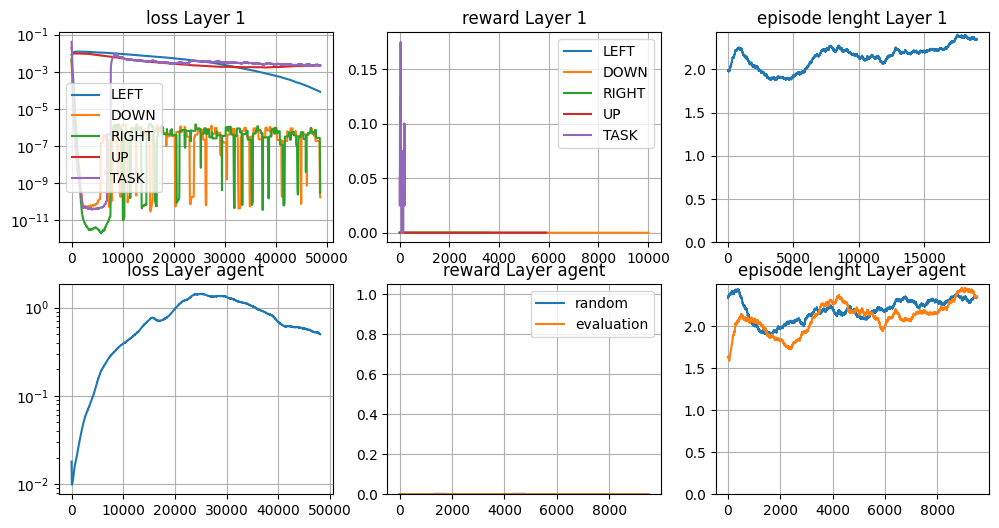

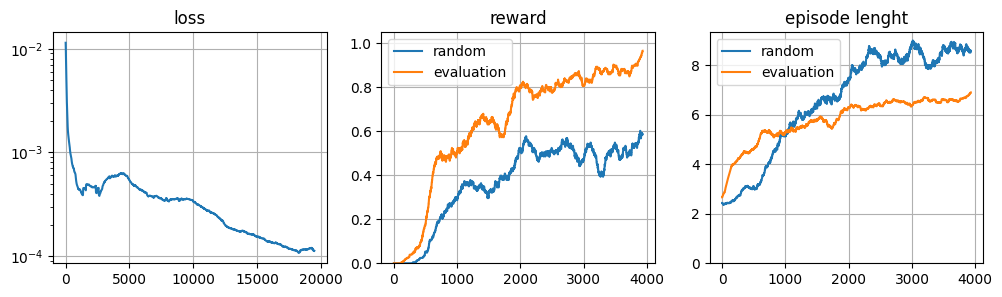

In [10]:
if isinstance(p_frozen, float):
    p_frozen = [p_frozen]
for p in p_frozen:
    dir_path = utils_save.path_to_save_dir(map_base, map_scale, p, one_shot)
    files = sorted(os.listdir(dir_path + "models/"))[3:]
    mango_agent_files = [name for name in files if name.startswith("mango_agent")]
    run_ids = [f"run_{name[-9:-7]}" for name in mango_agent_files]
    mango_agents = [
        utils_save.load_from_file(dir_path + "models/" + file_name)
        for file_name in mango_agent_files
    ]
    agents_list, labels, colors = [mango_agents], ["mango"], ["tab:orange"]
    if plot_vanilla_agent:
        normal_agent_files = [name for name in files if name.startswith("normal_agent")]
        normal_agents = [
            utils_save.load_from_file(dir_path + "models/" + file_name)
            for file_name in normal_agent_files
        ]
        agents_list.append(normal_agents)
        labels.append("vanilla")
        colors.append("tab:blue")
    if plot_nomask_mango_agent:
        mango_nomask_agent_files = [name for name in files if name.startswith("nomask_mango_agent")]
        mango_nomask_agents = [
            utils_save.load_from_file(dir_path + "models/" + file_name)
            for file_name in mango_nomask_agent_files
        ]
        agents_list.append(mango_nomask_agents)
        labels.append("mango_nomask")
        colors.append("tab:green")

    os.makedirs(dir_path + "training/", exist_ok=True)
    for agents, run_id_str in zip(zip(*agents_list), run_ids):
        for agent, label, color in zip(agents, labels, colors):
            if isinstance(agent, Mango):
                utils_plot.plot_mango_agent_loss_reward(
                    agent, save_path=f"{dir_path}training/train_results_{run_id_str}_{label}.pdf"
                )
            else:
                utils_plot.plot_normal_agent_loss_reward(
                    agent, save_path=f"{dir_path}training/train_results_{run_id_str}_{label}.pdf"
                )